In [1]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
# rc('text', usetex=True)

(20, 1) (20, 1)


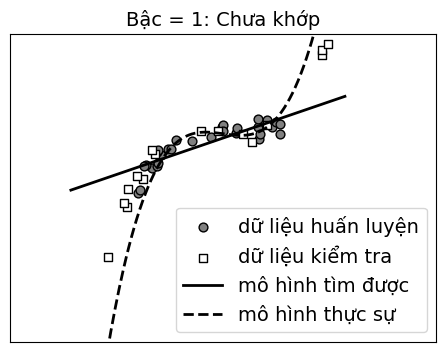

[[-41.75436732  12.2433881 ]]
(20, 1) (20, 1)


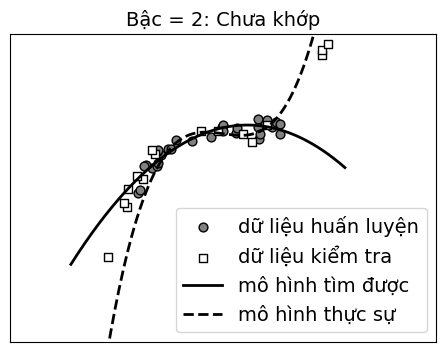

[[-59.97987024  36.99754053  -4.87240727]]
(20, 1) (20, 1)


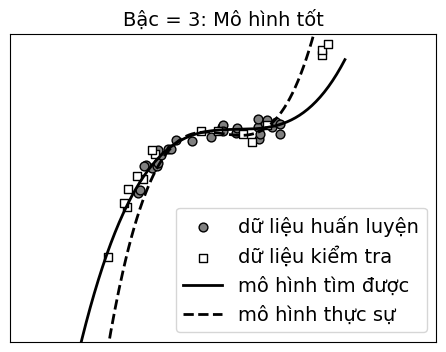

[[-73.33225762  66.59747286 -18.99378048   1.82196991]]
(20, 1) (20, 1)


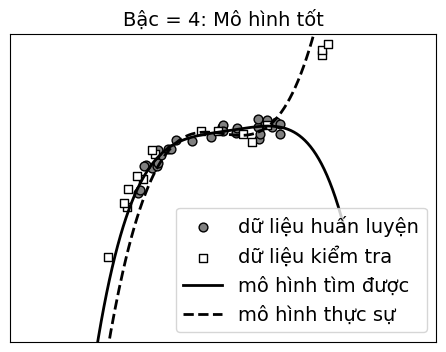

[[-80.25607415  90.18783856 -40.18198012   8.42989587  -0.66101431]]
(20, 1) (20, 1)


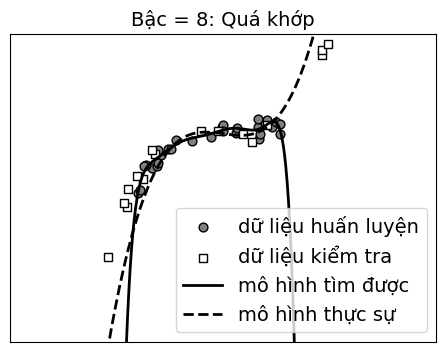

[[-1.31457607e+02  4.52551472e+02 -9.16175165e+02  1.04349383e+03
  -6.84660994e+02  2.64943692e+02 -5.95862811e+01  7.18747013e+00
  -3.58924595e-01]]
(20, 1) (20, 1)


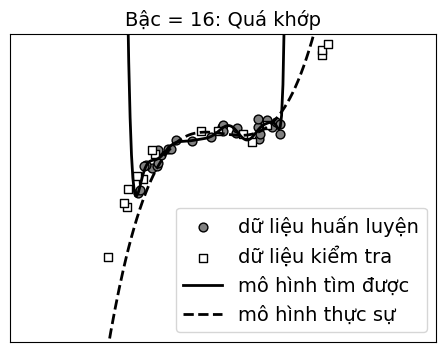

[[-3.21127690e+01 -6.93158219e+02  3.80257574e+03 -7.63124842e+03
   5.47444134e+03  2.53414552e+03 -5.96827787e+03  9.47706003e+02
   4.84182115e+03 -5.66542035e+03  3.35168032e+03 -1.25349397e+03
   3.13418358e+02 -5.25290094e+01  5.68462978e+00 -3.59840103e-01
   1.01356362e-02]]


In [5]:
# -*- coding: utf8 -*-
import matplotlib.font_manager as fm
set([f.name for f in fm.fontManager.ttflist])
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from sklearn import linear_model
plt.rcParams['font.family'] = 'Dejavu Sans'


N = 30
N_test = 20 
X = np.random.rand(N, 1)*5
y = 3*(X -2) * (X - 3)*(X-4) +  10*np.random.randn(N, 1)

X_test = (np.random.rand(N_test,1) - 1/8) *10
y_test = 3*(X_test -2) * (X_test - 3)*(X_test-4) +  10*np.random.randn(N_test, 1)

def buildX(X, d = 2):
    res = np.ones((X.shape[0], 1))
    for i in range(1, d+1):
        res = np.concatenate((res, X**i), axis = 1)
    return res 

def myfit(X, y, d):
    Xbar = buildX(X, d)
    regr = linear_model.LinearRegression(fit_intercept=False) # fit_intercept = False for calculating the bias
    regr.fit(Xbar, y)

    w = regr.coef_
    # Display result
    w_0 = w[0][0]
    w_1 = w[0][1]
    x0 = np.linspace(-2, 7, 200, endpoint=True)
    y0 = np.zeros_like(x0)
    ytrue = 5*(x0 - 2)*(x0-3)*(x0-4)
    for i in range(d+1):
        y0 += w[0][i]*x0**i

    plt.figure(figsize=(5.5,4))
    # Draw the fitting line 
    l1 = plt.scatter(X.T, y.T, c = 'gray', marker='o', s = 40, label = 'dữ liệu huấn luyện', edgecolors = 'k')     # data 
    print(X_test.shape, y_test.shape)
    l2 = plt.scatter(X_test.T, y_test.T, c = 'w', marker = 's', s = 40, label = 'dữ liệu kiểm tra', edgecolors = 'k')     # data 
    
    l3, = plt.plot(x0, y0, 'k', linewidth = 2, label = "mô hình tìm được")   # the fitting line
    l4, = plt.plot(x0, ytrue, 'k--', linewidth = 2, label = "mô hình thực sự")   # the fitting line
    plt.xticks([], [])
    plt.yticks([], [])
    if d < 3:
        str1 = 'Chưa khớp'
    elif d > 4:
        str1 = 'Quá khớp'
    else:
        str1 = 'Mô hình tốt'
    str0 = 'Bậc = ' + str(d) + ': ' + str1
    plt.title(str0, fontsize = 14)
    plt.axis([-4, 10, np.amin(y_test) - 100, np.amax(y) + 100])
    plt.legend(handles = [l1, l2, l3, l4], fontsize = 14, loc = "best")
#     plt.legend(loc="best", )
    
    fn = 'linreg_' + str(d) + '.png'
    
#     plt.xlabel('$x$', fontsize = 20);
#     plt.ylabel('$y$', fontsize = 20);
    
#     plt.savefig(fn, bbox_inches='tight', dpi = 600)
    filename = 'poly' + str(d) + '.pdf'
    with PdfPages(filename) as pdf:
        pdf.savefig(bbox_inches='tight')
    plt.savefig('poly' + str(d) + '.png', bbox_inches = 'tight', dpi = 700)
    
    plt.show()
    print(w)

myfit(X, y, 1)
myfit(X, y, 2)
myfit(X, y, 3)
myfit(X, y, 4)
myfit(X, y, 8)
myfit(X, y, 16)

